데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


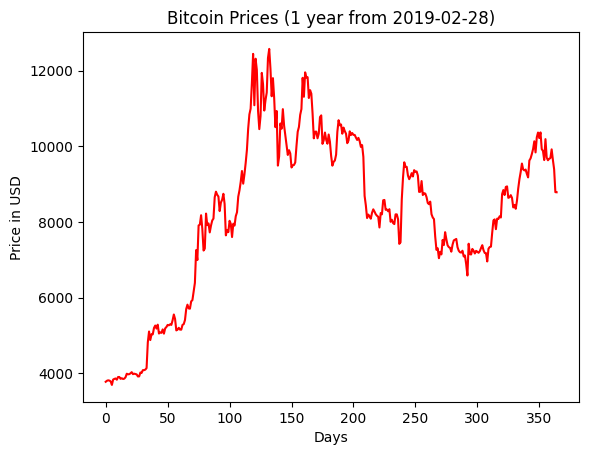

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


f = open('/content/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv', 'r')
coindesk_data = pd.read_csv(f, header=0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()
print('데이터 길이:', len(seq), '\n앞쪽 5개 값:', seq[0:5])

#그래프로 데이터 확인
plt.plot(seq, color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

In [4]:
def seq2dataset(seq, window, horizon):
  X = []; Y = []
  for i in range(len(seq)-(window+horizon)+1):
    x = seq[i:(i+window)]
    y = seq[i+window+horizon-1]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq, w, h)
print(X.shape, Y.shape)
print(X[0], Y[0])
print(X[-1], Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [5]:
split = int(len(X)*0.7)
x_train = X[:split]; y_train = Y[:split]
x_test = X[split:]; y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(250, 7, 1) (250, 1) (108, 7, 1) (108, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

# RNN Model
model = Sequential()
model.add(SimpleRNN(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
hist= model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=2)

# RNN evaluation
eval = model.evaluate(x_test, y_test, verbose=0)
print('loss:', eval[0], 'mae:', eval[1])

# RNN prediction
pred = model.predict(x_test)
print("MAPE : ", sum(abs(y_test-pred)/y_test)/len(x_test))

Epoch 1/200
250/250 - 2s - 9ms/step - loss: 771.2874 - mae: 771.2874 - val_loss: 347.9414 - val_mae: 347.9414
Epoch 2/200
250/250 - 1s - 4ms/step - loss: 460.1448 - mae: 460.1448 - val_loss: 354.3533 - val_mae: 354.3533
Epoch 3/200
250/250 - 1s - 5ms/step - loss: 376.9965 - mae: 376.9965 - val_loss: 187.3753 - val_mae: 187.3753
Epoch 4/200
250/250 - 1s - 6ms/step - loss: 342.5887 - mae: 342.5887 - val_loss: 193.0785 - val_mae: 193.0785
Epoch 5/200
250/250 - 1s - 5ms/step - loss: 367.5931 - mae: 367.5931 - val_loss: 508.7980 - val_mae: 508.7980
Epoch 6/200
250/250 - 1s - 5ms/step - loss: 356.7920 - mae: 356.7920 - val_loss: 267.8174 - val_mae: 267.8174
Epoch 7/200
250/250 - 1s - 3ms/step - loss: 323.7507 - mae: 323.7507 - val_loss: 230.0642 - val_mae: 230.0642
Epoch 8/200
250/250 - 1s - 5ms/step - loss: 329.4612 - mae: 329.4612 - val_loss: 287.3105 - val_mae: 287.3105
Epoch 9/200
250/250 - 1s - 5ms/step - loss: 342.8767 - mae: 342.8767 - val_loss: 177.4125 - val_mae: 177.4125
Epoch 10/2

In [9]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
hist= model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=2)

# LSTM evaluation
eval = model.evaluate(x_test, y_test, verbose=0)
print('loss:', eval[0], 'mae:', eval[1])

# LSTM prediction
pred = model.predict(x_test)
print("MAPE : ", sum(abs(y_test-pred)/y_test)/len(x_test))

Epoch 1/200
250/250 - 3s - 13ms/step - loss: 902.4660 - mae: 902.4660 - val_loss: 421.7383 - val_mae: 421.7383
Epoch 2/200
250/250 - 2s - 8ms/step - loss: 592.3372 - mae: 592.3372 - val_loss: 353.7947 - val_mae: 353.7947
Epoch 3/200
250/250 - 1s - 6ms/step - loss: 514.9203 - mae: 514.9203 - val_loss: 359.9732 - val_mae: 359.9732
Epoch 4/200
250/250 - 4s - 15ms/step - loss: 527.6688 - mae: 527.6688 - val_loss: 428.8175 - val_mae: 428.8175
Epoch 5/200
250/250 - 4s - 16ms/step - loss: 516.0415 - mae: 516.0415 - val_loss: 316.6570 - val_mae: 316.6570
Epoch 6/200
250/250 - 2s - 6ms/step - loss: 500.4158 - mae: 500.4158 - val_loss: 312.4928 - val_mae: 312.4928
Epoch 7/200
250/250 - 2s - 10ms/step - loss: 594.2860 - mae: 594.2860 - val_loss: 391.1000 - val_mae: 391.1000
Epoch 8/200
250/250 - 3s - 11ms/step - loss: 584.2493 - mae: 584.2493 - val_loss: 322.7453 - val_mae: 322.7453
Epoch 9/200
250/250 - 3s - 11ms/step - loss: 560.0212 - mae: 560.0212 - val_loss: 556.7974 - val_mae: 556.7974
Epoc

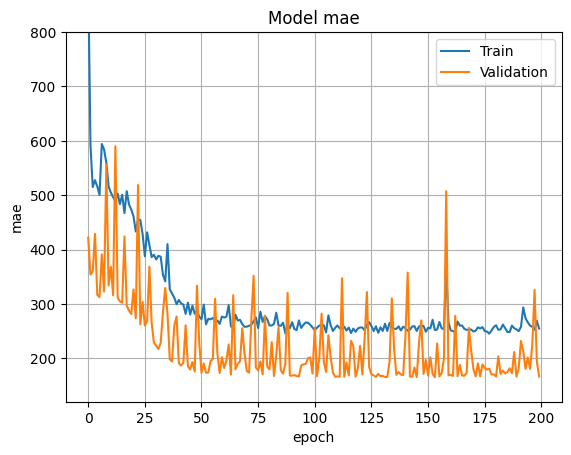

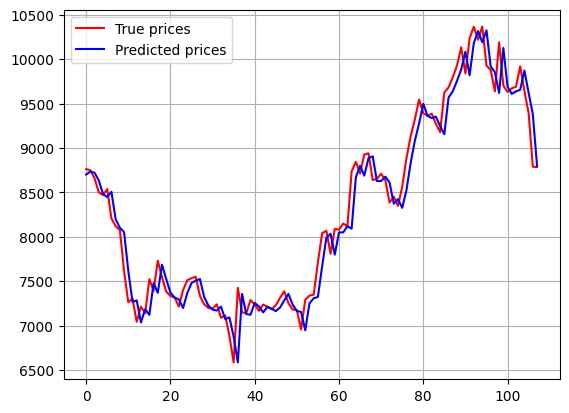

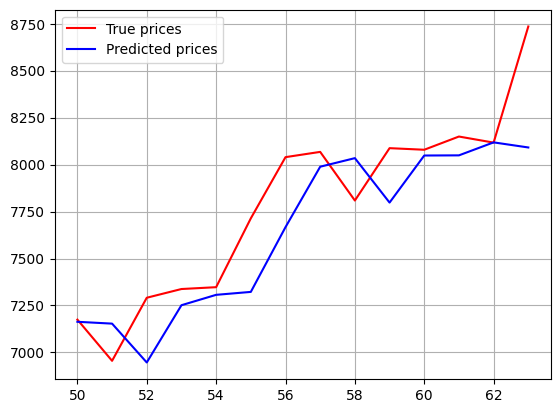

In [11]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim([120,800])
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()


x_range=range(len(y_test))
plt.plot(x_range, y_test[x_range],color='red')
plt.plot(x_range, pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

x_range=range(50, 64)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()